In [9]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4171, 32)
training_labels (4171,)

loaded toy data!
test_data (0,)
training_data (1000, 2)
training_labels (1000,)


In [22]:
spam_data = np.load(f"data/spam-data.npz")
spam_data["training_data"].shape

(4171, 32)

In [11]:
mnist = np.load(f"data/mnist-data.npz")
mnist_training_data = mnist['training_data']
mnist_training_labels = mnist['training_labels']
mnist_test_data = mnist['test_data']
mnist_training_labels

array([3, 7, 1, ..., 3, 7, 1], dtype=uint8)

In [12]:

mnist_indices = np.arange(len(mnist_training_data))
np.random.shuffle(mnist_indices)
mnist_training_data = mnist_training_data[mnist_indices]
mnist_training_labels = mnist_training_labels[mnist_indices]

mnist_training_labels

array([6, 8, 6, ..., 0, 3, 7], dtype=uint8)

In [4]:

# Shuffle MNIST dataset
mnist_indices = np.arange(len(mnist_training_data))
np.random.shuffle(mnist_indices)
mnist_training_data = mnist_training_data[mnist_indices]
mnist_training_labels = mnist_training_labels[mnist_indices]

# Split MNIST dataset
mnist_validation_size = 10000
mnist_train_images = mnist_training_data[:-mnist_validation_size]
mnist_train_labels = mnist_training_labels[:-mnist_validation_size]
mnist_validation_images = mnist_training_data[-mnist_validation_size:]
mnist_validation_labels = mnist_training_labels[-mnist_validation_size:]

mnist_train_labels.shape

(50000,)

In [20]:
spam = np.load(f"data/spam-data.npz")
spam_training_data = spam['training_data']
spam_training_labels = spam['training_labels']
spam_test_data = spam['test_data']
spam_training_labels

array([1, 1, 1, ..., 0, 0, 0])

In [23]:

# Shuffle Spam dataset
spam_indices = np.arange(len(spam_training_data))
np.random.shuffle(spam_indices)
spam_training_data = spam_training_data[spam_indices]
spam_training_labels = spam_training_labels[spam_indices]

# Split Spam dataset
spam_validation_size = int(len(spam_training_data) * 0.2)
spam_train_data = spam_training_data[:-spam_validation_size]
spam_train_labels = spam_training_labels[:-spam_validation_size]
spam_validation_data = spam_training_data[-spam_validation_size:]
spam_validation_labels = spam_training_labels[-spam_validation_size:]
spam_train_labels.shape


(3337,)

Question 3B 

In [27]:

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

QUESTION 4 


In [14]:

mnist_clf = svm.SVC(kernel='linear')

training_values = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracies = {"train": [], "val": []}

for value in training_values:
    
    # flatten the images for SVM input
    flattened_train_images = mnist_train_images[:value].reshape(value, -1)
    flattened_validation_images = mnist_validation_images.reshape(len(mnist_validation_images), -1)

    # flatten labels 
    flattened_train_labels = mnist_train_labels[:value].reshape(-1)
    flattened_validation_labels = mnist_validation_labels.reshape(-1)

    # training svm classifier 
    mnist_clf.fit(flattened_train_images, flattened_train_labels)

    # Calculate accuracies
    train_accuracy = compute_accuracy(flattened_train_labels, mnist_clf.predict(flattened_train_images))
    valid_accuracy = compute_accuracy(flattened_validation_labels, mnist_clf.predict(flattened_validation_images))

    # Store and print accuracies
    accuracies["train"].append(train_accuracy)
    accuracies["val"].append(valid_accuracy)
    
    
    print(f"Training with {value} examples")
    print(f"Training accuracy: {train_accuracy} \nValidation Accuracy: {valid_accuracy}\n")


Training with 100 examples
Training accuracy: 1.0 
Validation Accuracy: 0.7775

Training with 200 examples
Training accuracy: 1.0 
Validation Accuracy: 0.8336

Training with 500 examples
Training accuracy: 1.0 
Validation Accuracy: 0.8563

Training with 1000 examples
Training accuracy: 1.0 
Validation Accuracy: 0.8803

Training with 2000 examples
Training accuracy: 1.0 
Validation Accuracy: 0.8947

Training with 5000 examples
Training accuracy: 1.0 
Validation Accuracy: 0.9017

Training with 10000 examples
Training accuracy: 1.0 
Validation Accuracy: 0.908



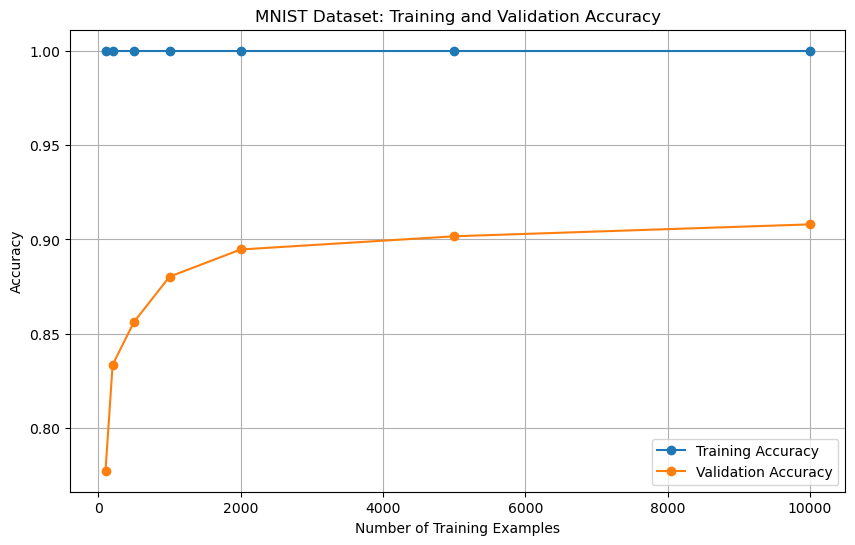

In [15]:
# Plotting for MNIST Dataset
plt.figure(figsize=(10, 6))
plt.plot(training_values, accuracies["train"], label='Training Accuracy', marker='o')
plt.plot(training_values, accuracies["val"], label='Validation Accuracy', marker='o')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('MNIST Dataset: Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:


# Flatten the training and validation images
train_images = mnist_train_images.reshape(mnist_train_images.shape[0], -1)
validation_images = mnist_validation_images.reshape(mnist_validation_images.shape[0], -1)

# Using 10,000 training examples
train_images_subset = train_images[:1000]
train_labels_subset = mnist_train_labels[:1000]

# Define C values
C_values = [0.0000001, 0.00001, 0.001, 0.1, 10, 1000]
c_accuracies = {"train": [], "val": []}


# Train and evaluate models
for C in C_values:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(train_images_subset, train_labels_subset)

    
    
    # Calculate accuracies
    train_accuracy = compute_accuracy(mnist_train_labels, clf.predict(train_images))
    valid_accuracy = compute_accuracy(mnist_validation_labels, clf.predict(validation_images))

    # Store accuracies
    c_accuracies["train"].append(train_accuracy)
    c_accuracies["val"].append(valid_accuracy)
    
    #Print accuracies 
    print(f"C value:{C}")
    print(f"Training accuracy: {train_accuracy} \nValidation Accuracy: {valid_accuracy}\n")
    

# Determine the best C value
best_C = C_values[np.argmax(c_accuracies["train"])]
print(f"Best C Value: {best_C}")


C value:1e-07
Training accuracy: 0.87852 
Validation Accuracy: 0.8753

C value:1e-05
Training accuracy: 0.88452 
Validation Accuracy: 0.8803

C value:0.001
Training accuracy: 0.88452 
Validation Accuracy: 0.8803

C value:0.1
Training accuracy: 0.88452 
Validation Accuracy: 0.8803

C value:10
Training accuracy: 0.88452 
Validation Accuracy: 0.8803

C value:1000
Training accuracy: 0.88452 
Validation Accuracy: 0.8803

Best C Value: 1e-05


In [26]:
import math 

def mnist_svm(): 
    # Flatten the training and validation images
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], -1)
    validation_images = mnist_validation_images.reshape(mnist_validation_images.shape[0], -1)

    # Using 2,000 training examples
    train_images_subset = train_images[:2000]
    train_labels_subset = mnist_train_labels[:2000]

    # Define C values
    C_values = [10 * math.pow(10, x) for x in range(0, 8)]
    c_accuracies = {"train": [], "val": []}


    # Train and evaluate models
    for C in C_values:
        clf = svm.SVC(C=C, kernel='rbf')
        clf.fit(train_images_subset, train_labels_subset)

        # Calculate accuracies
        train_accuracy = compute_accuracy(mnist_train_labels, clf.predict(train_images))
        valid_accuracy = compute_accuracy(mnist_validation_labels, clf.predict(validation_images))

        # Store accuracies
        c_accuracies["train"].append(train_accuracy)
        c_accuracies["val"].append(valid_accuracy)

        #Print accuracies 
        print(f"C value:{C}")
        print(f"Training accuracy: {train_accuracy} \nValidation Accuracy: {valid_accuracy}\n")


    # Determine the best C value
    best_C = C_values[np.argmax(c_accuracies["train"])]
    print(f"Best C Value: {best_C}")

    return svm.SVC(C=best_C, kernel='rbf') 

best_C_mnist = mnist_svm()

C value:10.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

C value:100.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

C value:1000.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

C value:10000.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

C value:100000.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

C value:1000000.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

C value:10000000.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

C value:100000000.0
Training accuracy: 0.9413 
Validation Accuracy: 0.9361

Best C Value: 10.0


In [30]:
#A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
import numpy as np

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('mnist_submission.csv', index_label='Id')                                        




best_C_mnist.fit(train_images_subset, train_labels_subset)

results_to_csv(best_C_mnist.predict(mnist_test_data.reshape(mnist_test_data.shape[0], -1)))



In [11]:
spam_clf = svm.SVC(kernel='linear')

training_values = [100, 200, 500, 1000, 2000]
accuracies = {"train": [], "val": []}

for value in training_values:
    
    # flatten the images for SVM input
    flattened_train_data = spam_train_data[:value].reshape(value, -1)
    flattened_validation_data = spam_validation_data.reshape(len(spam_validation_data), -1)

    # flatten labels 
    flattened_train_labels = spam_train_labels[:value].reshape(-1)
    flattened_validation_labels = spam_validation_labels.reshape(-1)

    # training svm classifier 
    spam_clf.fit(flattened_train_data, flattened_train_labels)

    # Calculate accuracies
    train_accuracy = compute_accuracy(flattened_train_labels, spam_clf.predict(flattened_train_data))
    valid_accuracy = compute_accuracy(flattened_validation_labels, spam_clf.predict(flattened_validation_data))

    # Store and print accuracies
    accuracies["train"].append(train_accuracy)
    accuracies["val"].append(valid_accuracy)
    
    
    print(f"Training with {value} examples")
    print(f"Training accuracy: {train_accuracy} \nValidation Accuracy: {valid_accuracy}\n")


Training with 100 examples
Training accuracy: 0.85 
Validation Accuracy: 0.7805755395683454

Training with 200 examples
Training accuracy: 0.855 
Validation Accuracy: 0.7925659472422062

Training with 500 examples
Training accuracy: 0.822 
Validation Accuracy: 0.8177458033573142

Training with 1000 examples
Training accuracy: 0.797 
Validation Accuracy: 0.8093525179856115

Training with 2000 examples
Training accuracy: 0.8055 
Validation Accuracy: 0.8081534772182254



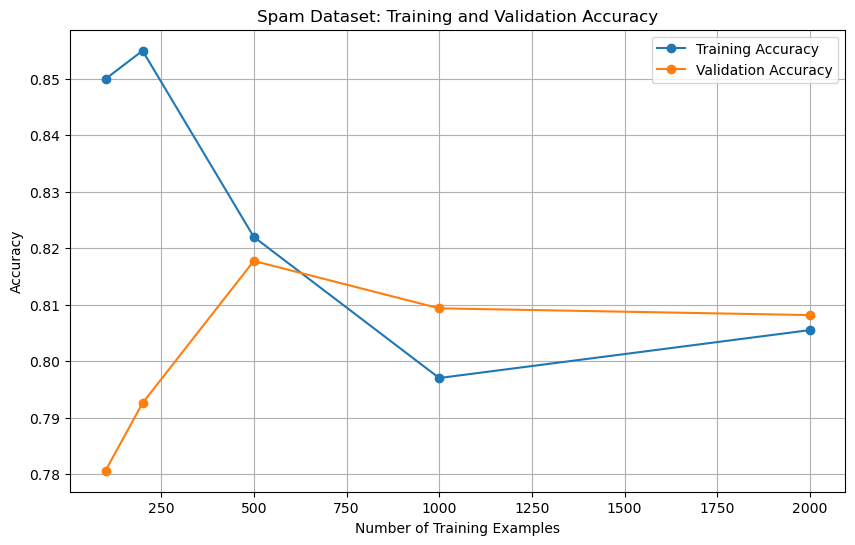

In [12]:
# Plotting for Spam Dataset
plt.figure(figsize=(10, 6))
plt.plot(training_values, accuracies["train"], label='Training Accuracy', marker='o')
plt.plot(training_values, accuracies["val"], label='Validation Accuracy', marker='o')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Spam Dataset: Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

QUESTION 6 

In [13]:

# Shuffle the data # dont know if we need to shuffle 
indices = np.arange(spam_train_data.shape[0])
np.random.shuffle(indices)
spam_train_data_shuffled = spam_train_data[indices]
spam_train_labels_shuffled = spam_train_labels[indices]

# Define C values
C_values = [0.0000001, 0.00001, 0.001, 0.1, 10, 1000]
fold_accuracies = {C: [] for C in C_values}
k = 5
fold_size = len(spam_train_data) // k

# 5-fold cross-validation
for i in range(k):
    # Create validation and training sets for this fold
    start, end = i * fold_size, (i + 1) * fold_size
    validation_data = spam_train_data_shuffled[start:end]
    validation_labels = spam_train_labels_shuffled[start:end]
    train_data = np.concatenate((spam_train_data_shuffled[:start], spam_train_data_shuffled[end:]))
    train_labels = np.concatenate((spam_train_labels_shuffled[:start], spam_train_labels_shuffled[end:]))

    for C in C_values:
        # Train the model
        clf = svm.SVC(C=C, kernel='linear')
        clf.fit(train_data, train_labels)

        # Compute accuracy
        accuracy = compute_accuracy(validation_labels, clf.predict(validation_data))
        fold_accuracies[C].append(accuracy)

# Average accuracies and find the best C
best_C = max(C_values, key=lambda C: np.mean(fold_accuracies[C]))
print(f"Best C Value: {best_C}")

# Print C values and their corresponding averaged accuracies
for C in C_values:
    print(f"C value: {C}, Average Accuracy: {np.mean(fold_accuracies[C])}")


Best C Value: 1000
C value: 1e-07, Average Accuracy: 0.7097451274362818
C value: 1e-05, Average Accuracy: 0.7097451274362818
C value: 0.001, Average Accuracy: 0.7448275862068965
C value: 0.1, Average Accuracy: 0.790704647676162
C value: 10, Average Accuracy: 0.8023988005997001
C value: 1000, Average Accuracy: 0.8032983508245876


In [39]:
'''
**************** PLEASE READ ***************

Script that reads in spam and ham messages and converts each training example
into a feature vector

Code intended for UC Berkeley course CS 189/289A: Machine Learning

Requirements:
-scipy ('pip install scipy')

To add your own features, create a function that takes in the raw text and
word frequency dictionary and outputs a int or float. Then add your feature
in the function 'def generate_feature_vector'

The output of your file will be a .mat file. The data will be accessible using
the following keys:
    -'training_data'
    -'training_labels'
    -'test_data'

Please direct any bugs to kevintee@berkeley.edu
'''

from collections import defaultdict
import glob
import re
import scipy.io
import numpy as np
import pdb

NUM_TRAINING_EXAMPLES = 4172
NUM_TEST_EXAMPLES = 1000

BASE_DIR = 'data/'
SPAM_DIR = 'spam/'
HAM_DIR = 'ham/'
TEST_DIR = 'test/'

# ************* Features *************

# Features that look for certain words
def freq_pain_feature(text, freq):
    return float(freq['pain'])

def freq_private_feature(text, freq):
    return float(freq['private'])

def freq_bank_feature(text, freq):
    return float(freq['bank'])

def freq_money_feature(text, freq):
    return float(freq['money'])

def freq_drug_feature(text, freq):
    return float(freq['drug'])

def freq_spam_feature(text, freq):
    return float(freq['spam'])

def freq_prescription_feature(text, freq):
    return float(freq['prescription'])

def freq_creative_feature(text, freq):
    return float(freq['creative'])

def freq_height_feature(text, freq):
    return float(freq['height'])

def freq_featured_feature(text, freq):
    return float(freq['featured'])

def freq_differ_feature(text, freq):
    return float(freq['differ'])

def freq_width_feature(text, freq):
    return float(freq['width'])

def freq_other_feature(text, freq):
    return float(freq['other'])

def freq_energy_feature(text, freq):
    return float(freq['energy'])

def freq_business_feature(text, freq):
    return float(freq['business'])

def freq_message_feature(text, freq):
    return float(freq['message'])

def freq_volumes_feature(text, freq):
    return float(freq['volumes'])

def freq_revision_feature(text, freq):
    return float(freq['revision'])

def freq_path_feature(text, freq):
    return float(freq['path'])

def freq_meter_feature(text, freq):
    return float(freq['meter'])

def freq_memo_feature(text, freq):
    return float(freq['memo'])

def freq_planning_feature(text, freq):
    return float(freq['planning'])

def freq_pleased_feature(text, freq):
    return float(freq['pleased'])

def freq_record_feature(text, freq):
    return float(freq['record'])

def freq_out_feature(text, freq):
    return float(freq['out'])

# Features that look for certain characters
def freq_semicolon_feature(text, freq):
    return text.count(';')

def freq_dollar_feature(text, freq):
    return text.count('$')

def freq_sharp_feature(text, freq):
    return text.count('#')

def freq_exclamation_feature(text, freq):
    return text.count('!')

def freq_para_feature(text, freq):
    return text.count('(')

def freq_bracket_feature(text, freq):
    return text.count('[')

def freq_and_feature(text, freq):
    return text.count('&')

# --------- Add your own feature methods ----------
# def example_feature(text, freq):
#     return int('example' in text)

def freq_money_feature(text, freq):
    return float(freq['money'])

def freq_html_feature(text, freq):
    return float(freq['html'])


def freq_align_feature(text, freq):
    return float(freq['align'])


def freq_please_feature(text, freq):
    return float(freq['please'])

def freq_body_feature(text, freq):
    return float(freq['body'])


def freq_free_feature(text, freq):
    return float(freq['free'])

def freq_bonus_feature(text, freq):
    return float(freq['bonus'])


def freq_winner_feature(text, freq):
    return float(freq['winner'])

def freq_urgent_feature(text, freq):
    return float(freq['urgent'])

def freq_penis_feature(text, freq):
    return float(freq['penis'])


def freq_cash_feature(text, freq):
    return float(freq['cash'])


def freq_free_feature(text, freq):
    return float(freq['free'])

# Generates a feature vector
def generate_feature_vector(text, freq):
    feature = []
    feature.append(freq_pain_feature(text, freq))
    feature.append(freq_private_feature(text, freq))
    feature.append(freq_bank_feature(text, freq))
    feature.append(freq_money_feature(text, freq))
    feature.append(freq_drug_feature(text, freq))
    feature.append(freq_spam_feature(text, freq))
    feature.append(freq_prescription_feature(text, freq))
    feature.append(freq_creative_feature(text, freq))
    feature.append(freq_height_feature(text, freq))
    feature.append(freq_featured_feature(text, freq))
    feature.append(freq_differ_feature(text, freq))
    feature.append(freq_width_feature(text, freq))
    feature.append(freq_other_feature(text, freq))
    feature.append(freq_energy_feature(text, freq))
    feature.append(freq_business_feature(text, freq))
    feature.append(freq_message_feature(text, freq))
    feature.append(freq_volumes_feature(text, freq))
    feature.append(freq_revision_feature(text, freq))
    feature.append(freq_path_feature(text, freq))
    feature.append(freq_meter_feature(text, freq))
    feature.append(freq_memo_feature(text, freq))
    feature.append(freq_planning_feature(text, freq))
    feature.append(freq_pleased_feature(text, freq))
    feature.append(freq_record_feature(text, freq))
    feature.append(freq_out_feature(text, freq))
    feature.append(freq_semicolon_feature(text, freq))
    feature.append(freq_dollar_feature(text, freq))
    feature.append(freq_sharp_feature(text, freq))
    feature.append(freq_exclamation_feature(text, freq))
    feature.append(freq_para_feature(text, freq))
    feature.append(freq_bracket_feature(text, freq))
    feature.append(freq_and_feature(text, freq))

    # --------- Add your own features here ---------
    # Make sure type is int or float
    feature.append(freq_money_feature(text, freq))
    feature.append(freq_html_feature(text, freq))
    feature.append(freq_align_feature(text, freq))
    feature.append(freq_body_feature(text, freq))
    feature.append(freq_please_feature(text, freq))
    feature.append(freq_winner_feature(text, freq))
    feature.append(freq_bonus_feature(text, freq))
    feature.append(freq_free_feature(text, freq))
    feature.append(freq_urgent_feature(text, freq))
    feature.append(freq_penis_feature(text, freq))
    feature.append(freq_cash_feature(text, freq))
    feature.append(freq_free_feature(text, freq))


    return feature

# This method generates a design matrix with a list of filenames
# Each file is a single training example
def generate_design_matrix(filenames):
    design_matrix = []
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            try:
                text = f.read() # Read in text from file
            except Exception as e:
                # skip files we have trouble reading.
                continue
            text = text.replace('\r\n', ' ') # Remove newline character
            words = re.findall(r'\w+', text)
            word_freq = defaultdict(int) # Frequency of all words
            for word in words:
                word_freq[word] += 1

            # Create a feature vector
            feature_vector = generate_feature_vector(text, word_freq)
            design_matrix.append(feature_vector)
    return design_matrix

# ************** Script starts here **************
# DO NOT MODIFY ANYTHING BELOW

spam_filenames = glob.glob(BASE_DIR + SPAM_DIR + '*.txt')
spam_design_matrix = generate_design_matrix(spam_filenames)
ham_filenames = glob.glob(BASE_DIR + HAM_DIR + '*.txt')
ham_design_matrix = generate_design_matrix(ham_filenames)
# Important: the test_filenames must be in numerical order as that is the
# order we will be evaluating your classifier
test_filenames = [BASE_DIR + TEST_DIR + str(x) + '.txt' for x in range(NUM_TEST_EXAMPLES)]
test_design_matrix = generate_design_matrix(test_filenames)

X = spam_design_matrix + ham_design_matrix
Y = np.array([1]*len(spam_design_matrix) + [0]*len(ham_design_matrix)).reshape((-1, 1)).squeeze()

np.savez(BASE_DIR + 'spam-data.npz', training_data=X, training_labels=Y, test_data=test_design_matrix)

In [40]:
def spam_svm(data): 
    # Shuffle the data 
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    spam_train_data_shuffled = data[indices]
    spam_train_labels_shuffled = spam_training_labels[indices]

    # Define C values
    C_values = C_values = np.geomspace(1.0, 70.0, 8)
    fold_accuracies = {C: [] for C in C_values}
    k = 5
    fold_size = len(spam_train_data) // k

    # 5-fold cross-validation
    for i in range(k):
        # Create validation and training sets for this fold
        start, end = i * fold_size, (i + 1) * fold_size
        validation_data = spam_train_data_shuffled[start:end]
        validation_labels = spam_train_labels_shuffled[start:end]
        train_data = np.concatenate((spam_train_data_shuffled[:start], spam_train_data_shuffled[end:]))
        train_labels = np.concatenate((spam_train_labels_shuffled[:start], spam_train_labels_shuffled[end:]))

        for C in C_values:
            # Train the model
            clf = svm.SVC(C=C, kernel='rbf')
            clf.fit(train_data, train_labels)

            # Compute accuracy
            accuracy = compute_accuracy(validation_labels, clf.predict(validation_data))
            fold_accuracies[C].append(accuracy)

    # Average accuracies and find the best C
    best_C = max(C_values, key=lambda C: np.mean(fold_accuracies[C]))
    print(f"Best C Value: {best_C}")

    # Print C values and their corresponding averaged accuracies
    for C in C_values:
        print(f"C value: {C}, Average Accuracy: {np.mean(fold_accuracies[C])}")

    
    return float(best_C)

#best_C_spam = spam_svm()


In [41]:
import pandas as pd

# Function to save predictions to CSV
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('spam_submission.csv', index_label='Id')

# Your best C value found from previous hyperparameter tuning
best_C_value = spam_svm(spam_train_data)

# Initialize and train the best SVM model on the spam training dataset
best_C_spam = svm.SVC(kernel='rbf', C=best_C_value)
best_C_spam.fit(spam_train_data,spam_train_labels)

# Predict on the spam test dataset
spam_predictions = best_C_spam.predict(spam_test_data)

# Save predictions to CSV
results_to_csv(spam_predictions)


Best C Value: 20.793479637719607
C value: 1.0, Average Accuracy: 0.7877061469265367
C value: 1.8347860702154204, Average Accuracy: 0.7934032983508246
C value: 3.366439923456546, Average Accuracy: 0.8008995502248875
C value: 6.176697077775136, Average Accuracy: 0.8083958020989506
C value: 11.332917758242115, Average Accuracy: 0.8236881559220389
C value: 20.793479637719607, Average Accuracy: 0.8251874062968515
C value: 38.15158679059591, Average Accuracy: 0.8242878560719641
C value: 70.0, Average Accuracy: 0.8236881559220389


In [38]:

print(f"Number of features in training data: {spam_train_data.shape[1]}")
print(f"Number of features in test data: {spam_test_data.shape[1]}")

Number of features in training data: 32
Number of features in test data: 32
